# Sparx Technical Task

*Author: Ricky Hui*


In [3]:
# Core libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score


In [4]:
#Import Library from helpers.py
from helpers import clean_data, summary_statistics, plot_correlation_matrix, plot_distributions


In [5]:
df = pd.read_csv("data/personalized_learning_dataset.csv")

In [6]:
df.describe()

,Age,Time_Spent_on_Videos,Quiz_Attempts,Quiz_Scores,Forum_Participation,Assignment_Completion_Rate,Final_Exam_Score,Feedback_Score
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,32.137700,255.375400,2.500500,64.578600,24.616200,69.546800,64.697000,3.012600
std,10.062647,141.656392,1.122642,20.289125,14.330305,17.360782,20.096417,1.421423
min,15.000000,10.000000,1.000000,30.000000,0.000000,40.000000,30.000000,1.000000
25%,24.000000,131.000000,1.000000,47.000000,12.000000,54.000000,47.000000,2.000000
50%,32.000000,257.000000,3.000000,65.000000,25.000000,69.000000,65.000000,3.000000
75%,41.000000,378.000000,4.000000,82.000000,37.000000,85.000000,82.000000,4.000000
max,49.000000,499.000000,4.000000,99.000000,49.000000,99.000000,99.000000,5.000000


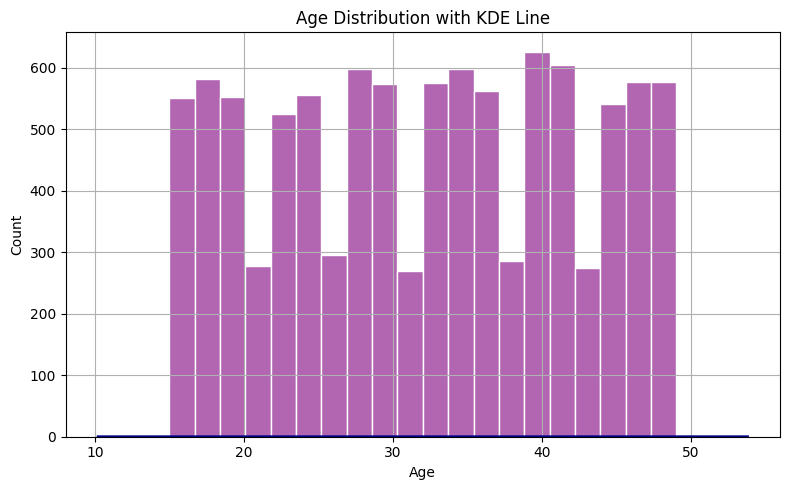

In [9]:
plot_distributions(df, ["Age"])


# Predicitve Modelling 

##  Train/Test Split

In [13]:
X = df[['Age', 'Quiz_Scores']]
y = df['Final_Exam_Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Model 1: Linear Regression

In [14]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f"Linear Regression MAE: {mae_lr:.2f}, R²: {r2_lr:.2f}")

Linear Regression MAE: 17.61, R²: -0.00


Model 2: Decision Tree Regressor

In [15]:
tree = DecisionTreeRegressor(max_depth=3, random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
mae_tree = mean_absolute_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)
print(f"Decision Tree MAE: {mae_tree:.2f}, R²: {r2_tree:.2f}")

Decision Tree MAE: 17.61, R²: -0.00


## 🔁 5. Cross-Validation

In [16]:
cv_scores = cross_val_score(tree, X, y, cv=5, scoring='neg_mean_absolute_error')
print(f"Decision Tree CV MAE: {-cv_scores.mean():.2f}")

Decision Tree CV MAE: 17.39


## 🛠️ 6. Simple Hyperparameter Tuning

In [17]:
param_grid = {'max_depth': [2, 3, 4, 5]}
grid = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=3, scoring='neg_mean_absolute_error')
grid.fit(X_train, y_train)
print(f"Best max_depth: {grid.best_params_['max_depth']}")

Best max_depth: 2


## ✅ 7. Summary & Recommendations

- **Linear Regression** MAE and R² give a quick baseline.
- **Decision Tree** allows easy interpretation and handles non-linearity.

**Recommendation:**
Encourage students to engage at least 3 sessions/week. A Decision Tree model shows performance increases sharply past this threshold. Suggest using this model for future prediction dashboards.